# Correlation and linear regression

## Correlation

Correlation $\neq$ Causation

* If two variables are correlated, variability in one variable *might* cause variability in the other. Or there may be another underlying variable that causes variations in both.
* Statistically significant correlations may be *spurious* - see examples at https://tylervigen.com/spurious-correlations

![images/correlation-causation-cage.png](images/correlation-causation-cage.png)

The caclulation of correlation is based on covariance.

The __variance__ $s_x^2$ has to be positive.

$$ s_x^2 = \frac{1}{N-1}\sum_{i=1}^N (x_i - \bar{x})(x_i - \bar{x})$$

The __covariance__ $s_{xy}^2$ can be positive or negative.  If $x_i$ tends to be above the mean $\bar{x}$ when $y_i$ tends to be above the mean, then the covariance is positive

$$ s_{xy}^2 = \frac{1}{N-1}\sum_{i=1}^N (x_i - \bar{x})(y_i - \bar{y})$$

The _Pearson correlation coefficient_ is the normalized covariance between two variables.

$$ r_{xy} = \frac{s_{xy}^2}{s_x s_y}$$



### Varying degrees of correlation

There may be a pattern in the data, but a linear model may not be appropriate.

![images/Correlation_examples.png](images/Correlation_examples.png)

[source](http://wikipedia.org/wiki/Correlation_and_dependence)

Parametric statistic (like Pearson's correlation are sensitive to outliers. For example, two radnomly generated sets of numbers might have a very low correlation coefficent, as shown below.

Text(0.5, 1.0, 'r = 0.035')

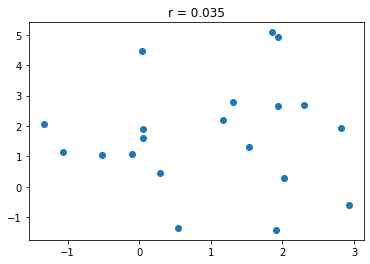

In [2]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

np.random.seed(437)
x = np.random.normal(1,1,20)
y = np.random.normal(2,2,20)

r = stats.pearsonr(x,y)

plt.figure()
plt.plot(x,y,'o')
plt.title('r = '+str(round(r[0],3)))

However, adding an outlier to this data set greatly inflates the correlation coefficient (to nearly 1).

Text(0.5, 1.0, 'r = 0.96')

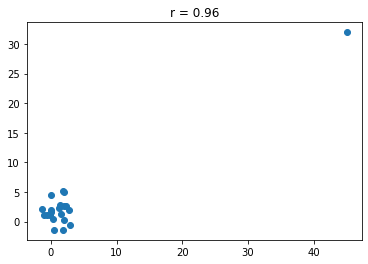

In [3]:
xo = np.append(x,45)
yo = np.append(y,32)

ro = stats.pearsonr(xo,yo)

plt.figure()
plt.plot(xo,yo,'o')
plt.title('r = '+str(round(ro[0],3)))

### Testing significance of linear correlation

The following test statistic, will follow a t distribution for randomly generated sets of data.

$$ t = |r|\frac{\sqrt{N-2}}{\sqrt{1-r^2}}$$ 

To test for significant at confidence level $1-\alpha$, calculate a t statistic and compare with a critical t value $t_{\nu,1-\alpha/2}$, where $\nu = N-2$ is the degrees of freedom. The degrees of freedom is $N-2$ because you can always draw a line through two data points. Three data points are needed to obatin one independent piece of information.

## Linear regression (Type I) ###
### Least-Squares Regression

__Type I regression minimizes the variance along one axis__

- x is the independent variable
- y is the dependent variable
- Goal: minimize sum of squared errors, SSE

(0, 7)

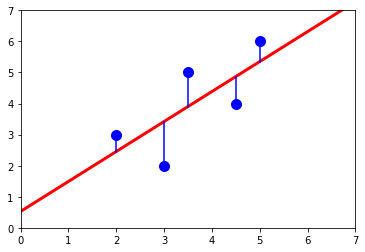

In [5]:
x = np.array([2,3,3.5,4.5,5])
y = np.array([3,2,5,4,6])

slope,intercept,r,p,se = stats.linregress(x,y)

plt.figure()
plt.plot(x,y,'bo',ms=10)
plt.plot(np.array([0,7]),slope*np.array([0,7])+intercept,'r-',lw=3)
for xp,yp in zip(x,y):
    plt.plot([xp,xp],[yp,slope*xp+intercept],'b')
plt.xlim([0,7])
plt.ylim([0,7])

Type I regression assumes that the x variable is exactly known (error free)

```python
from scipy import stats
help(stats.linregress)
```

Examples of (nearly) error free measurements:
- Time
- Chemical standard (when compared to an error-prone sensor)
- Distance

Type 1 regression minimizes the sum of square error.

Be careful when choosing a subset!

![images/temperature_trends_short_vs_long.png](images/temperature_trends_short_vs_long.png)

_source_: Walsh, J., et al. (11 January 2013), “Figure 6: Short-term Variations Versus Long-term Trend, in: D. Is the global temperature still increasing? Isn’t there recent evidence that it is actually 1 cooling?, in: Appendix I: NCA Climate Science - Addressing Commonly Asked Questions from A to Z”, in Federal Advisory Committee Draft Climate Assessment. A report by the National Climate Assessment Development Advisory Committee (NCADAC)[1], Washington, DC, USA: U.S. Global Change Research Program, p.1065.

### Linear Regression Assumptions

* Validity of linear model

* Constant variance: same variance regardless of x value (homoscdastic)

* Independence of errors (errors are uncorrelated)

Anscombe's quartet shows data sets with the same mean and standard deviation in both variables, as well as the same regression line.

The code for this example comes from:
http://matplotlib.org/examples/pylab_examples/anscombe.html

Text(3, 12, 'IV')

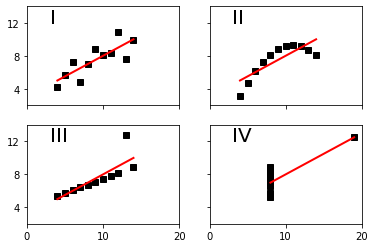

In [6]:
x = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
y1 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
y2 = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74])
y3 = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
x4 = np.array([8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8])
y4 = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89])

def fit(x):
    return 3 + 0.5*x

xfit = np.array([np.amin(x), np.amax(x)])

plt.figure()
plt.subplot(221)
plt.plot(x, y1, 'ks', xfit, fit(xfit), 'r-', lw=2)
plt.axis([2, 20, 2, 14])
plt.setp(plt.gca(), xticklabels=[], yticks=(4, 8, 12), xticks=(0, 10, 20))
plt.text(3, 12, 'I', fontsize=20)

plt.subplot(222)
plt.plot(x, y2, 'ks', xfit, fit(xfit), 'r-', lw=2)
plt.axis([2, 20, 2, 14])
plt.setp(plt.gca(), xticklabels=[], yticks=(4, 8, 12), yticklabels=[], xticks=(0, 10, 20))
plt.text(3, 12, 'II', fontsize=20)

plt.subplot(223)
plt.plot(x, y3, 'ks', xfit, fit(xfit), 'r-', lw=2)
plt.axis([2, 20, 2, 14])
plt.text(3, 12, 'III', fontsize=20)
plt.setp(plt.gca(), yticks=(4, 8, 12), xticks=(0, 10, 20))

plt.subplot(224)
xfit = np.array([np.amin(x4), np.amax(x4)])
plt.plot(x4, y4, 'ks', xfit, fit(xfit), 'r-', lw=2)
plt.axis([2, 20, 2, 14])
plt.setp(plt.gca(), yticklabels=[], yticks=(4, 8, 12), xticks=(0, 10, 20))
plt.text(3, 12, 'IV', fontsize=20)

### Minimizing the sum of squared errors, SSE

The goal of any "least squares" regression is to minimize the sum of squared errors.

$$SSE  = \sum_{i=1} ^N (y_i - \hat{y_i})^2$$ 

Where:

* $y_i$ is the y value of the data point
* $\hat{y_i}$ is  the y value predicted by the linear model (i.e. the y position of the line at the same x position as the data)
* $(y_i - \hat{y_i})^2$ is the squared error

On an $x$-$y$ plot, the SSE can be thought of the sum of the vertical distances between the data values $y_i$ and the corresponding model values $\hat{y}_i$.

### Regression slope

The regression slope depends on the covariance $s_{xy}^2$ and the variance $s_x^2$.

$$ \hat{a}_2 = \frac{s_{xy}^2}{s_x^2} = \frac{ \sum_{i=1} ^N (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1} ^N (x_i - \bar{x})^2}$$

The regression slope can also be throught of as scaling the correlation coefficient by the standard deviations $s_y$ and $s_x$.

$$ \hat{a}_2 = \frac{s_{xy}^2}{s_x^2} = r_{xy}\frac{s_y}{s_x}$$

Either way, the slope depends on both the spread of the data and the degree to which $x$ and $y$ covary. If the correlation between $x$ and $y$ is zero, the least squares regression line is flat. The regression line can have a steep slope if there is a strong correlation between $x$ and $y$, and the standard deviation of $y$ is large relative to the standard deviation of $x$.

### Regression Intercept

The least squares regression line is guaranteed to go through the mean values of $x$ and $y$. This property can be used to find the intercept of the regression line.

$$ \hat{a}_1 = \bar{y} - \hat{a}_2\bar{x} $$

### Standard error of the estimate

The standard error of the estimate is a measure of the goodness of fit of the model. It depends on the sum of squared errors, which is minimized in least squares regression, as well as the degrees of freedom $\nu = N - 2$.

$$s_e = \left( \frac{SSE}{N-2} \right)^{1/2}$$

Note that this is different from the standard error of the data, $SE_x = s_x/\sqrt{N}$, which was used earlier to describe how well the mean of a variable $x$ is known.

### Standard error of the regression slope

The standard error of the regression slope (sometimes called the standard error of the gradient) describes how well $a_2$ is known. It depends on the standard error of the estimate, and the variance in $x$.

$$s_{a_2} = \sqrt{\frac{s_e^2}{\sum_{i=1}^N (x-\bar{x})^2}}$$

Note that the `stderr` result given by the `stats.linregress` function is Python refers to the standard error of the slope, $s_{a_2}$.

### Confidence intervals for the regression slope

The standard error of the slope $s_{a_2}$ can be used to calculate confidence intervals for the regression slope. 

$$\hat{a}_2 - t_{\nu,1 - \alpha /2} s_{a_2} < a_2 < \hat{a}_2 + t_{\nu,1- \alpha /2} s_{a_2}$$

Based on the data, these intervals describe a range in which the true slope $a_2$ is thought to lie. This depends on the estimated slope $\hat{a}_2$, as well as the degrees of freedom $\nu$ and significance level $\alpha$. This is similar to how confidence intervals are calculated for an estimate of the mean, $\bar{x}$.

### Review: relationship between correlation and regression ###

The concepts of correlation and regression are closely related. The correlation coefficient $r$ is given by the relationship

$$ r = \frac{s_{xy}}{s_x s_y}$$

where $s_{xy}$ is the covariance between the $x$ variable and the $y$ variable, $s_x$ is the standard deviation of the $x$ variable and $s_y$ is the standard deviation of the $y$ variable.

In the linear model

$$ \hat{y} = \hat{a}_1 + \hat{a}_2 x,$$

the ordinary least squares regression slope $\hat{a}_2$ is given by the relationship

$$ \hat{a}_2 = \frac{s_{xy}}{s_x s_x}$$

This means that the relationship betweeen the correlation coefficient $r$ and the least squares regression slope $\hat{a}_2$ is 

$$ r = \hat{a}_2 \frac{s_y}{s_x}.$$

This has several important implications:

* $r$ and $a_2$ always have the same sign ($r$ is negative when the regression line has negative slope)

* If $r = 0$, then  $\hat{a}_2 = 0$ and $s_{xy} = 0$
    
There is also a close relationship between testing the null hypothesis of zero correlation and the confidence intervals on the regression slope. If the null hypothesis can be rejected at a given confidence level, then the confidence intervals of the slope will not include zero.

### Linear regression (Type II) ###

Type 2 regression is the case where there are potentially errors or uncertainty in both the x and y variables. In a Type 1 regression, one variable needs to be selected as the independent variable ($x$) and another needs to be the dependent variable ($y$). The least-squares method in the Type I approach minimizes the sum of squared errors $\sum(\hat{y}-y)^2$. Errors in the $x$ variable are not considered in the Type 1 approach.

![images/type_2_reg.png](images/type_2_reg.png)

Image: Emery and Thomson

Reference for Geometric Mean Function Regression (GMFR, a.k.a. neutral regression):

Ricker, W. E. Computation and uses of central trend lines
Can. J. Zool., 1984, 62, 1897-1905 

__Calculating Geometric Mean Function Regression__

- $\hat{a}_{2yx}$ : slope of regression of y on x

- $\hat{a}_{2xy}$ : slope of regression of y on x

- Geometric mean: $\hat{a}_{2GM} = \sqrt{\frac{\hat{a}_{2yx}} {\hat{a}_{2xy}}}$


#### Simplest Type 2 regression - the geometric mean

The difference between the two Type 1 regression lines above can be used to illustrate one potential solution, the geometric mean regression. This is the line that bisects the two Type 1 regression lines. This can be thought of as a "compromise" between the two lines. An important assumption in this approach is that the uncertainty in each variable is assumed to be proportional to the sample standard deviation. If the uncertainty is dominated by natural variability, this might be a reasonable assumption. In cases, where the uncertainty is dominated by measurement error, there might be better ways of quantifying the uncertainty based on the analytical techniques. In this case, more sophisticated iterative approaches can be taken to determine the appropriate Type 2 regression model.

Detailed discussion can be found in Ricker, W. E. (1984) Computation and uses of central trend lines, *Can. J. Zool.*, 62, 1897-1905.

Glover, Jenkins and Doney provide an algorithm for determining the geometric mean regression slope:

* Determine the slope of the regression of $y$ on $x$, $slope_{yx}$

* Determine the slope of the regression of $x$ on $y$, $slope_{xy}$

* Calculate the geometric mean regression slope, $slope_{GMR} = \sqrt{\frac{slope_{yx}}{slope_{xy}}}$

* Determine the intercept by noting that the regression line goes through the mean of $x$ and the mean of $y$